# Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
sns.set(style="darkgrid")
%matplotlib inline
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
	
from sklearn.utils import resample

#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
#function to display dataframes side by side    
from IPython.display import display_html
def display_side_by_side(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

## HELPER FUNCTIONS:

In [2]:
# Helper function for Distribution Plots

def distplot(figRows,figCols,xSize, ySize, features, colors):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(bank[features[row][col]], color=colors[row][col], ax=axesplt, kde=True, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

In [3]:
# Helper function for Box Plots

def boxplot(figRows,figCols,xSize, ySize, features, colors, hue=None, orient='h'):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.boxplot(features[row][col], data= bank, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_xlabel(features[row][col],fontsize=20)

In [4]:
# Helper function for Count Plots

def countplot(figRows,figCols,xSize, ySize, features, colors=None,palette=None,hue=None, orient=None, rotation=90):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    if(colors is not None):
        colors = np.array(colors).reshape(figRows, figCols)
    if(palette is not None):
        palette = np.array(palette).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
                
            if(colors is None):
                plot = sns.countplot(features[row][col], data=bank, palette=palette[row][col], ax=axesplt, orient=orient, hue=hue)
            elif(palette is None):
                plot = sns.countplot(features[row][col], data=bank, color=colors[row][col], ax=axesplt, orient=orient, hue=hue)
            plot.set_title(features[row][col],fontsize=20)
            plot.set_xlabel(None)
            plot.set_xticklabels(rotation=rotation, labels=plot.get_xticklabels(),fontweight='demibold',fontsize='large')
            

In [5]:
# Helper function for Distribution Plots for Categorical Columns.

def catdist(cols):
    dfs = []
    for col in cols:
        colData = pd.DataFrame(bank[col].value_counts(), columns=[col])
        colData['%'] = round((colData[col]/colData[col].sum())*100,2)
        dfs.append(colData)
    display_side_by_side(dfs)

# Read the data as a data frame

In [6]:
bank = pd.read_csv("bank-full.csv")
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

# Perform basic EDA

## a. Shape of the data

In [7]:
print('The total number of rows :', bank.shape[0])
print('The total number of columns :', bank.shape[1])

The total number of rows : 45211
The total number of columns : 17


## b. Data type of each attribute

In [8]:
bank.info()
print('===========================================')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observations

1. **Numeric Attributes**: Having int64 as dtype

    a. age    
    b. balance    
    c. day    
    d. duration    
    e. campaign    
    f. pdays    
    g. previous
    
2. **Categorical Attributes**: Having object as dtype

    a. job    
    b. marital    
    c. education    
    d. default    
    e. housing    
    f. loan    
    g. contact    
    h. month    
    i. poutcome    
    j. target - (Binary)


## c. Checking the presence of missing values

In [9]:
print(bank.isna().sum())
print('===================')
print(bank.isnull().sum())
print('===================')
printmd('**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data', color="blue")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


<span style='color:blue'>**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data</span>

## d. 5 point summary of numerical attributes

In [10]:
display(bank.describe().transpose())
print('==============================')
printmd('Total negative values under **balance**', color="brown")
display(bank[bank['balance'] < 0].shape[0])
print('==============================')
display(bank[bank['pdays'] == -1]['pdays'].value_counts())
print('==============================')
display(bank[bank['previous'] == 0]['previous'].value_counts())

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

<span style='color:brown'>Total negative values under **balance**</span>

3766

-1    36954
Name: pdays, dtype: int64

0    36954
Name: previous, dtype: int64

#### Observations

1. **age**: It is evenly distributed as mean(40.9) and median(39) are close, but there are few outliers. 
2. **balance**. Evenly distributed around zero as there are many customers (3766) with negative balance. There are also customers with very high balance. Hence right skewed with mean(1362.27) greater than median(448).
3. **day**: It is evenly distributed. 
4. **duration**: It is skewed towards right as mean(258.16) is greater than median(180) and there are many outliers and few with very large values.
5. **campaign**: Evenly distributed when you consider quartiles Q1, Q2 and Q3. However it is skewed towards right as there are outliers with high values.
6. **pdays**: There are many "-1" (#36954) as can be seen from min, Q1,Q2,Q3 values. This could be mistyped values. There are many customers who were contacted month after the last contact as can be seen from the mean (40 days) and there are many outliers with large values as well. 
6. **previous**: There are many "0" (#36954) as can be seen from min,Q1,Q2,Q3 values, which means many customers were contacted for the first time. There are many outliers with large values as well and hence highly skewed.

## Distributions of Numeric Attributes

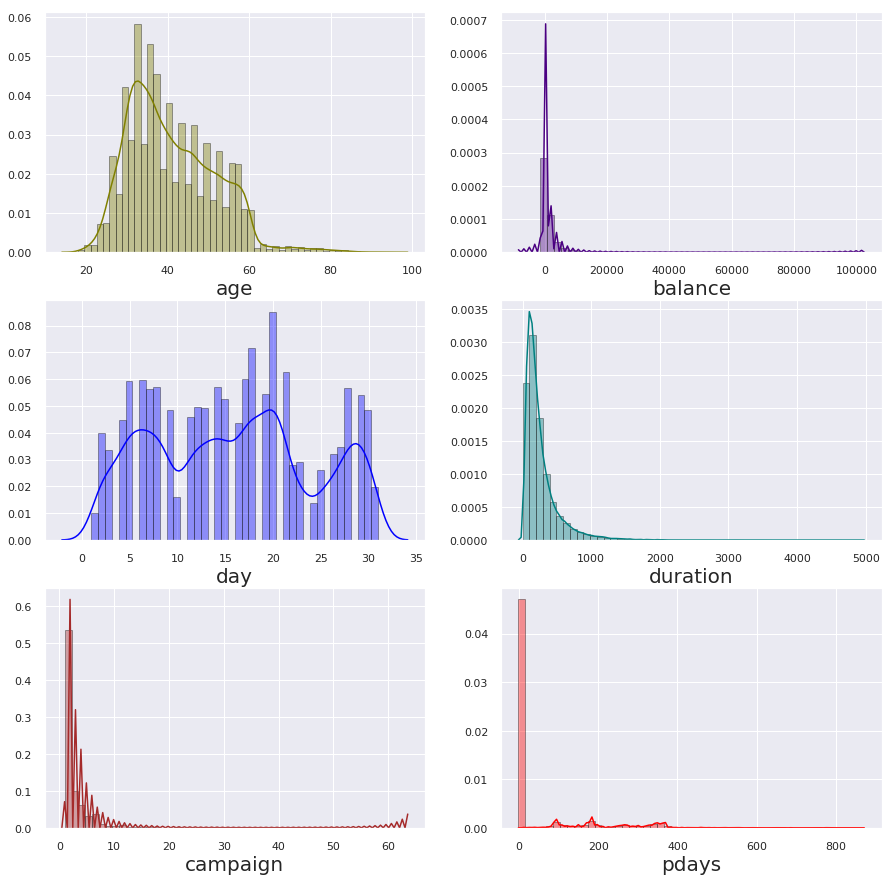

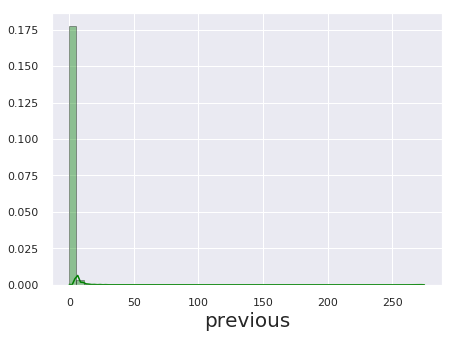

In [12]:
distplot(3,2, 15,15, 
         ['age', 'balance','day', 'duration', 'campaign', 'pdays'], 
         ['olive', 'indigo', 'blue', 'teal', 'brown', 'red'])

distplot(1,1, 7, 5, 
         ['previous'], 
         ['green'])

#### Observations

1. **age**: It is evenly distributed with few outliers. 
2. **balance**. Evenly distributed around zero as there are many customers with negative balance. There are also few customers with very large balance.
3. **day**: It is evenly distributed. 
4. **duration**: It is skewed towards right and there are many outliers and few with very large values.
5. **campaign**: It is skewed towards right as there are outliers with high values.
6. **pdays**: There are many "-1". There are many outliers with large values as well and hence highly skewed.
6. **previous**: There are many "0" which means many customers were contacted for the first time. There are many outliers with large values as well and hence highly skewed.

## Measure of skewness 

In [13]:
pd.DataFrame.from_dict(dict(
    {
        'age':bank.age.skew(), 
        'balance': bank.balance.skew(), 
        'day': bank.day.skew(),
        'duration': bank.duration.skew(),
        'campaign': bank.campaign.skew(),
        'pdays': bank.pdays.skew(),
        'previous': bank.previous.skew(),        
    }), orient='index', columns=['Skewness'])

Skewness
age        0.684818
balance    8.360308
day        0.093079
duration   3.144318
campaign   4.898650
pdays      2.615715
previous  41.846454

#### Observations
1. No skewness for **day** attribute as it is close to zero.
2. Minimal skewness for **age** attribute as it is less than 1.
3. **balance** is highly skewed as there are outliers on both higher end and negative side.
4. **duration**, **campaign**, **pdays** are highly skewed towards right.
5. **previous** is very highly skewed with a value of 41.8 as there lot of "0", and there are few records with large values i.e there are customers who were several times before this campaign.


## e. Checking the presence of outliers

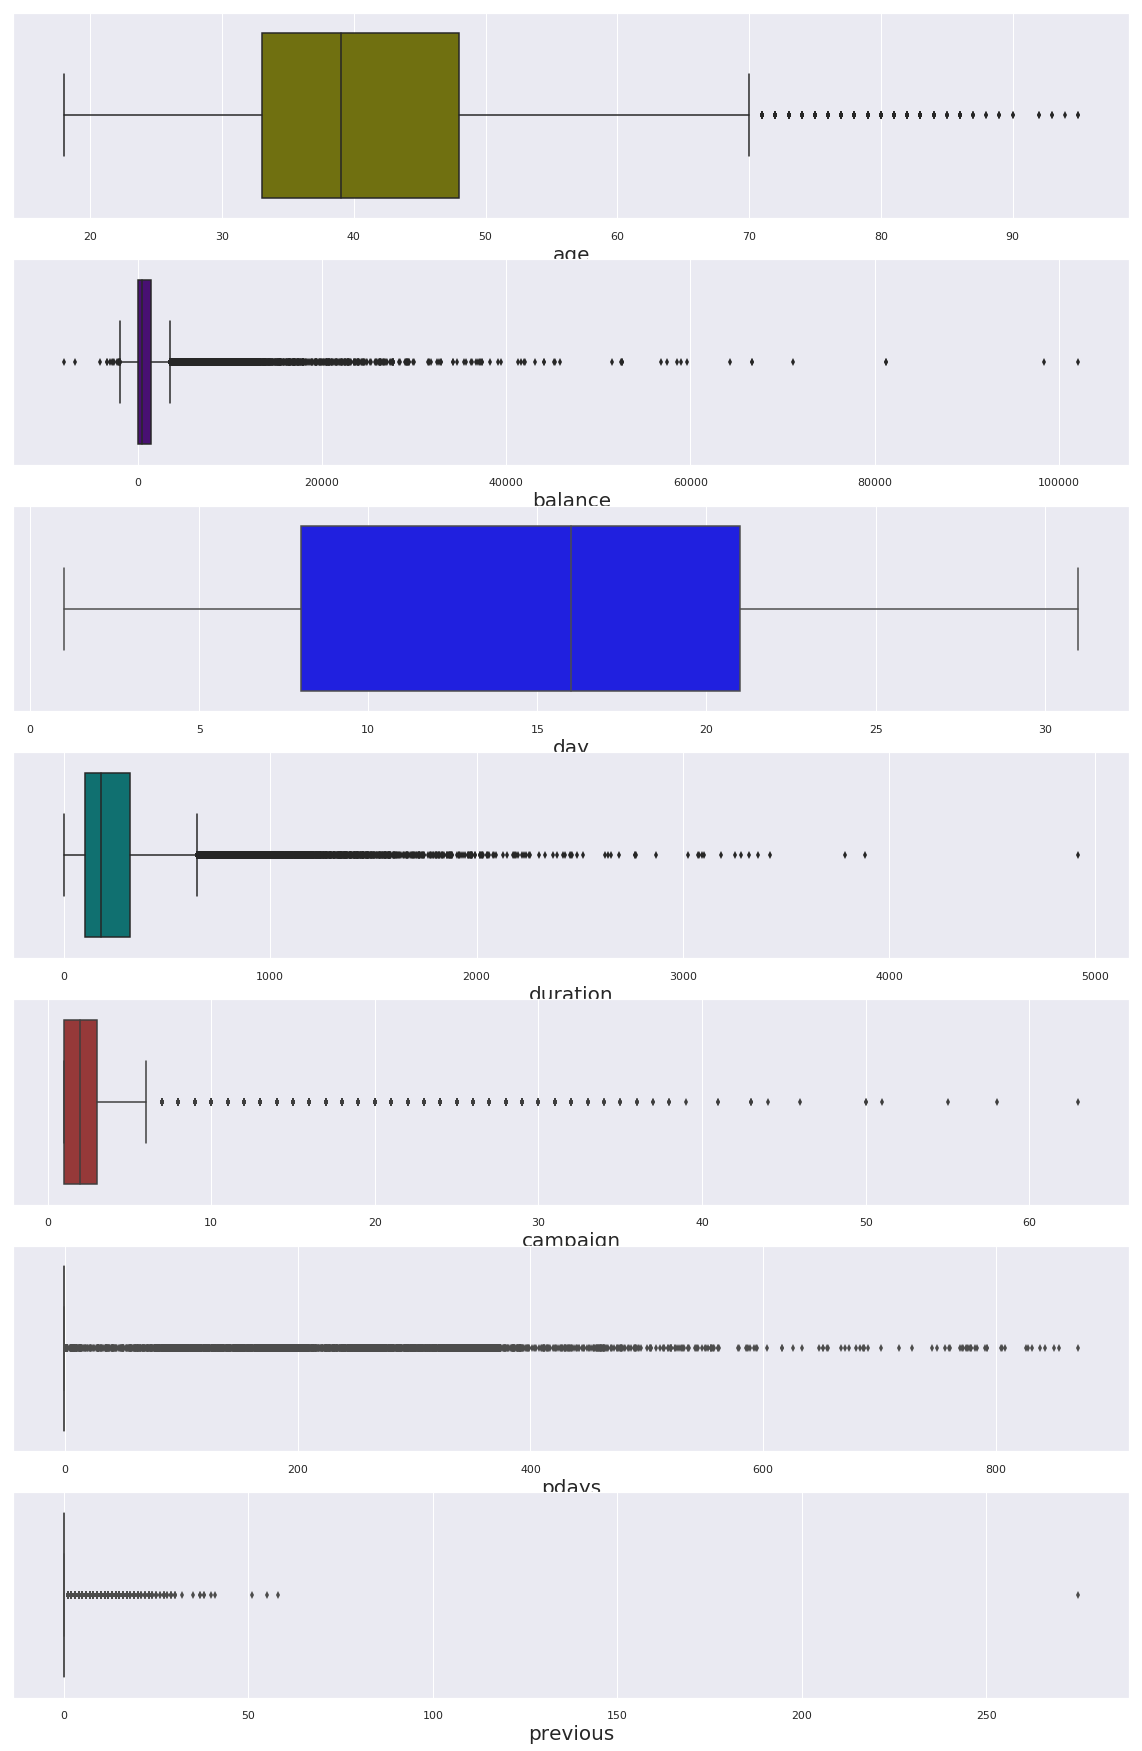

In [14]:
boxplot(7,1, 20,31, 
         ['age', 'balance','day', 'duration', 'campaign', 'pdays', 'previous'], 
         ['olive', 'indigo', 'blue', 'teal', 'brown', 'red', 'cyan'])

#### Observations

1. No outliers for **day** attribute as it is close to zero.
2. Few outliers for **age** attribute.
3. Lot of outliers for **balance** **duration**, **campaign**, 
4. There are no min,Q1,Q2,Q3,max for **pdays** and **previous** as data is highly imbalanced with "-1" and "0" respectively. Hence many values are considered outliers.

## Different values of each categorical attributes and their distributions

In [15]:
def catdist(cols):
    dfs = []
    for col in cols:
        colData = pd.DataFrame(bank[col].value_counts(), columns=[col])
        colData['%'] = round((colData[col]/colData[col].sum())*100,2)
        dfs.append(colData)
    display_side_by_side(dfs)
        

In [16]:
catdist(['Target', 'default', 'housing', 'loan', 'marital', 'contact', 'education', 'poutcome', 'job', 'month'])

Target 
 % 
 
 
 
 
 no 
 39922 
 88.3 
 
 
 yes 
 5289 
 11.7 
 
 
 
 
 
 
 default 
 % 
 
 
 
 
 no 
 44396 
 98.2 
 
 
 yes 
 815 
 1.8 
 
 
 
 
 
 
 housing 
 % 
 
 
 
 
 yes 
 25130 
 55.58 
 
 
 no 
 20081 
 44.42 
 
 
 
 
 
 
 loan 
 % 
 
 
 
 
 no 
 37967 
 83.98 
 
 
 yes 
 7244 
 16.02 
 
 
 
 
 
 
 marital 
 % 
 
 
 
 
 married 
 27214 
 60.19 
 
 
 single 
 12790 
 28.29 
 
 
 divorced 
 5207 
 11.52 
 
 
 
 
 
 
 contact 
 % 
 
 
 
 
 cellular 
 29285 
 64.77 
 
 
 unknown 
 13020 
 28.80 
 
 
 telephone 
 2906 
 6.43 
 
 
 
 
 
 
 education 
 % 
 
 
 
 
 secondary 
 23202 
 51.32 
 
 
 tertiary 
 13301 
 29.42 
 
 
 primary 
 6851 
 15.15 
 
 
 unknown 
 1857 
 4.11 
 
 
 
 
 
 
 poutcome 
 % 
 
 
 
 
 unknown 
 36959 
 81.75 
 
 
 failure 
 4901 
 10.84 
 
 
 other 
 1840 
 4.07 
 
 
 success 
 1511 
 3.34 
 
 
 
 
 
 
 job 
 % 
 
 
 
 
 blue-collar 
 9732 
 21.53 
 
 
 management 
 9458 
 20.92 
 
 
 technician 
 7597 
 16.80 
 
 
 admin. 
 5171 
 11.44 
 
 
 services 
 4154 
 9.19 
 
 
 retired 
 2264 
 5.01 
 
 
 self-employed 
 1579 
 3.49 
 
 
 entrepreneur 
 1487 
 3.29 
 
 
 unemployed 
 1303 
 2.88 
 
 
 housemaid 
 1240 
 2.74 
 
 
 student 
 938 
 2.07 
 
 
 unknown 
 288 
 0.64 
 
 
 
 
 
 
 month 
 % 
 
 
 
 
 may 
 13766 
 30.45 
 
 
 jul 
 6895 
 15.25 
 
 
 aug 
 6247 
 13.82 
 
 
 jun 
 5341 
 11.81 
 
 
 nov 
 3970 
 8.78 
 
 
 apr 
 2932 
 6.49 
 
 
 feb 
 2649 
 5.86 
 
 
 jan 
 1403 
 3.10 
 
 
 oct 
 738 
 1.63 
 
 
 sep 
 579 
 1.28 
 
 
 mar 
 477 
 1.06 
 
 
 dec 
 214 
 0.47

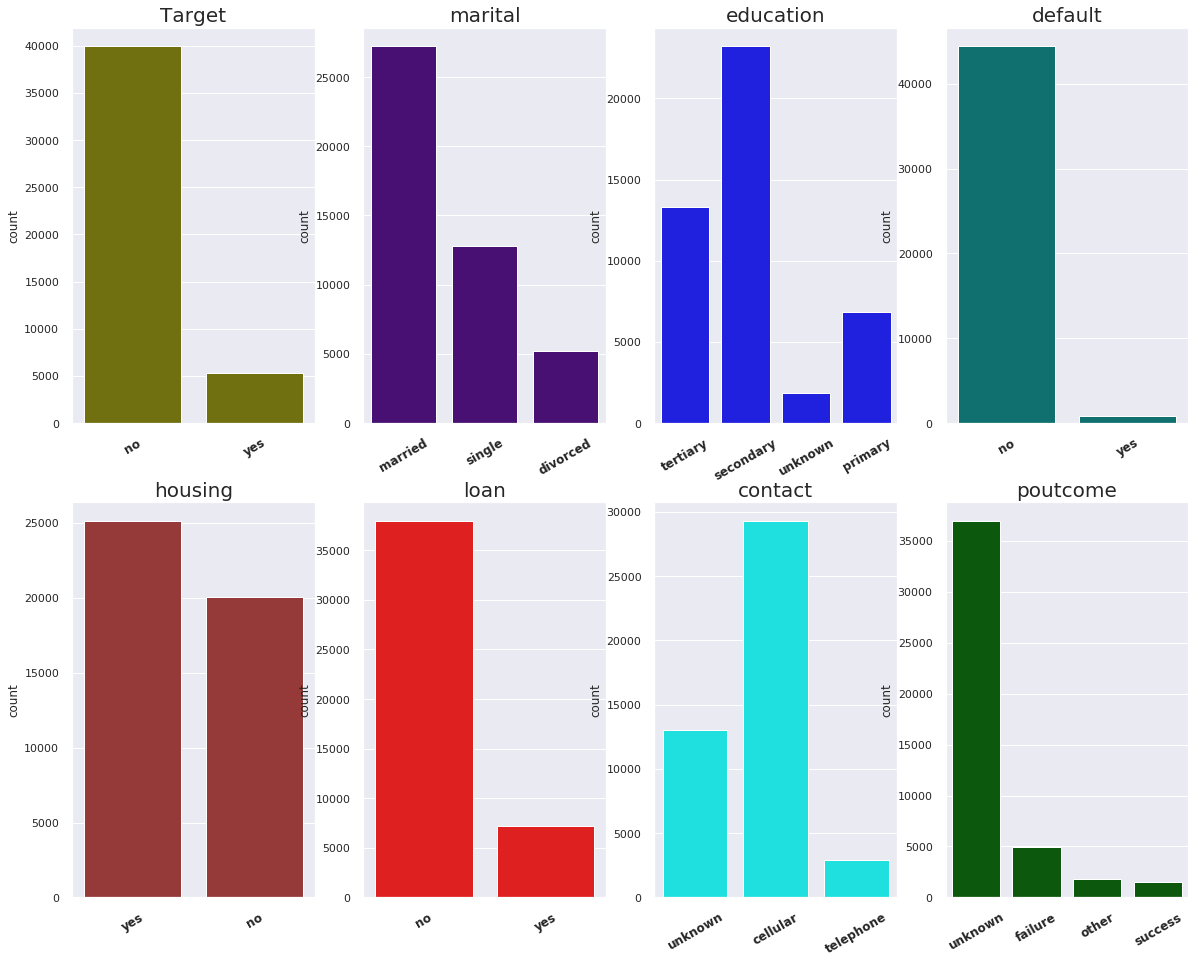

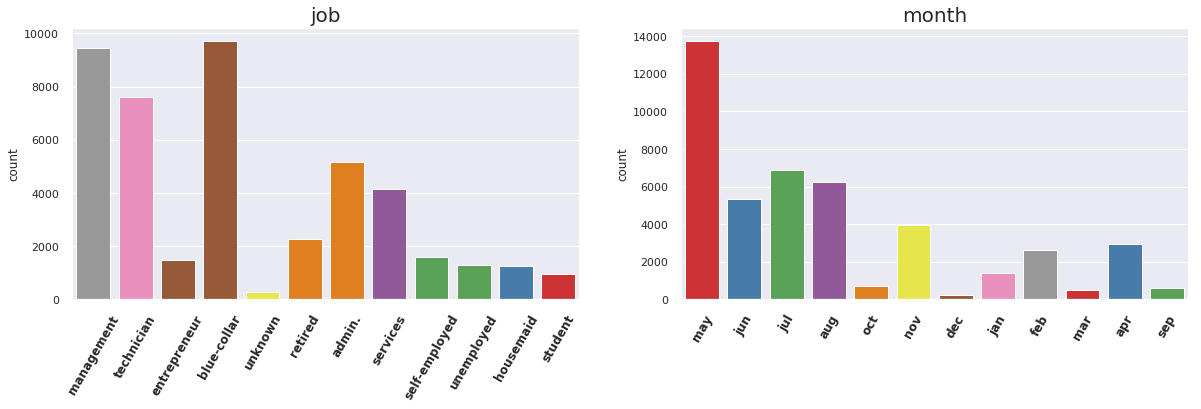

In [17]:
countplot(2,4, 20,16, 
         ['Target', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome', ], 
         ['olive', 'indigo', 'blue', 'teal', 'brown', 'red', 'cyan','darkgreen'], rotation=30)

countplot(1,2, 20,5, 
         ['job', 'month'], 
         palette=['Set1_r', 'Set1'], rotation=60)

#### Observations
1. **Target** attribute is highly imbalanced with large "No" (88.3%) and less "Yes" (11.7%). This means lot of customers did not subscribe to the Term deposit.
2. **default** attribute is highly imbalanced with large "No" (98.2%) and less "Yes" (1.8%). This means only few customers have credit in default.
3. **loan** attribute is highly imbalanced with large "No" (83.98%) and less "Yes" (16.02%). This means only few customers have personal loan.
4. **housing** is fairly distributed with 55.58% of customers who availed housing loan and 44.42% of customers who did not.
5. **martial** - there are several customers who married (60.19%) and fairly good amount of customer who are single (28.29%) and fewer divorcee (11.52%)
6. **contact** - it is natural in today's world that lot of customers use "Cellular" (64.77%) as comminucation type with telephone being the lowest. 
7. **education** - there are lot of customers who have completed secondary (51.32%) and tertiary (29.42%) education levels with few customers with only primary education. This means we have lot of customers who educated well. 
8. **poutcome** - we have little information on the outcome of the previous marketing campaign as there are lot of unknown (81.75%) and less information on whether campaign is successful or a failure.
9. **job** - data is faily distributed with different job types, but there are several customers with "blue-collar", "management" and 'technician' jobs
10. **month** - There are several customers who have been last contacted in the month of May (30.45%). Least contacted months are March, September, October and December. Otherwise customers have been last contacted fairly in remaining months.


## Distribution of categorical attributes with respect to Target attribute

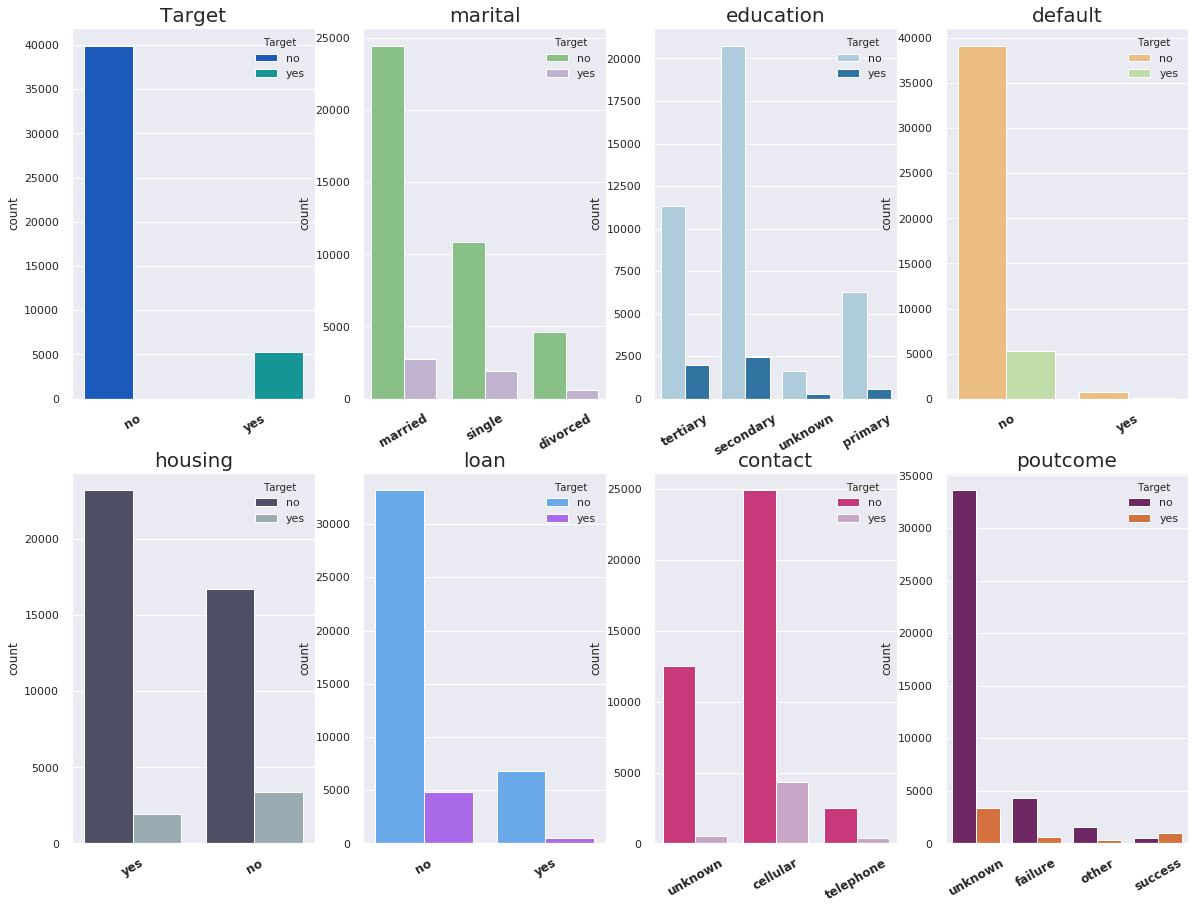

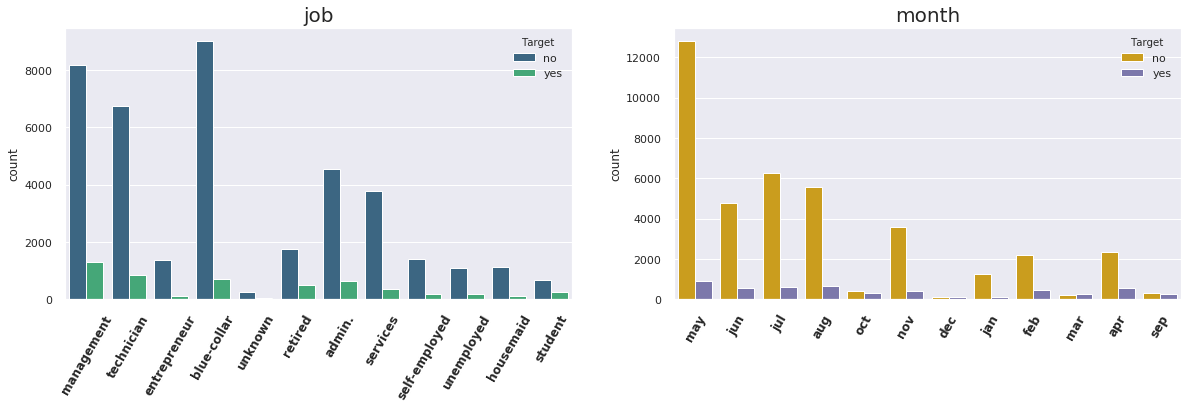

In [18]:
countplot(2,4, 20,15, 
         ['Target', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome'], 
         palette=['winter', 'Accent', 'Paired', 'Spectral', 'bone', 'cool', 'PuRd_r','inferno'], hue='Target', rotation=30)

countplot(1,2, 20,5, 
         ['job', 'month'], 
         palette=['viridis', 'Dark2_r'], hue='Target', rotation=60)

##### Observations

As per the data, customers who did not subscribe the **Term Deposit** are very high. The same is shown across different values of the categorical attributes
The term deposit subscription is slightly higher only when there was a successfull outcome of the previous marketing campaign. However since the total successful campaign is very less already, we can ignore this.


## Bivariate Analysis

In [19]:
def point_bar_plot(row, col, target, figRow, figCol, palette='rocket', fontsize='large', fontweight='demibold'):
    sns.set(style="whitegrid")
    f, axes = plt.subplots(2, 1, figsize=(figRow, figCol))
    pplot=sns.pointplot(row,col, data=bank, ax=axes[0], linestyles=['--'])
    pplot.set_xlabel(None)
    pplot.set_xticklabels(labels=pplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)    
    bplot=sns.barplot(row,col, data=bank, hue=target, ax=axes[1],palette=palette)
    bplot.set_xlabel(row,fontsize=20)
    bplot.set_xticklabels(labels=bplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)

In [20]:
def point_box_bar_plot(row, col, target, figRow, figCol, palette='rocket', fontsize='large', fontweight='demibold'):
    sns.set(style="whitegrid")
    f, axes = plt.subplots(3, 1, figsize=(figRow, figCol))
    pplot=sns.pointplot(row,col, data=bank, ax=axes[0], linestyles=['--'])
    pplot.set_xlabel(None)
    pplot.set_xticklabels(labels=pplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bxplot=sns.boxplot(row,col, data=bank, hue=target, ax=axes[1],palette='viridis')
    bxplot.set_xlabel(None)
    bxplot.set_xticklabels(labels=bxplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)
    bplot=sns.barplot(row,col, data=bank, hue=target, ax=axes[2],palette=palette)
    bplot.set_xlabel(row,fontsize=20)
    bplot.set_xticklabels(labels=bplot.get_xticklabels(),fontweight=fontweight,fontsize=fontsize)

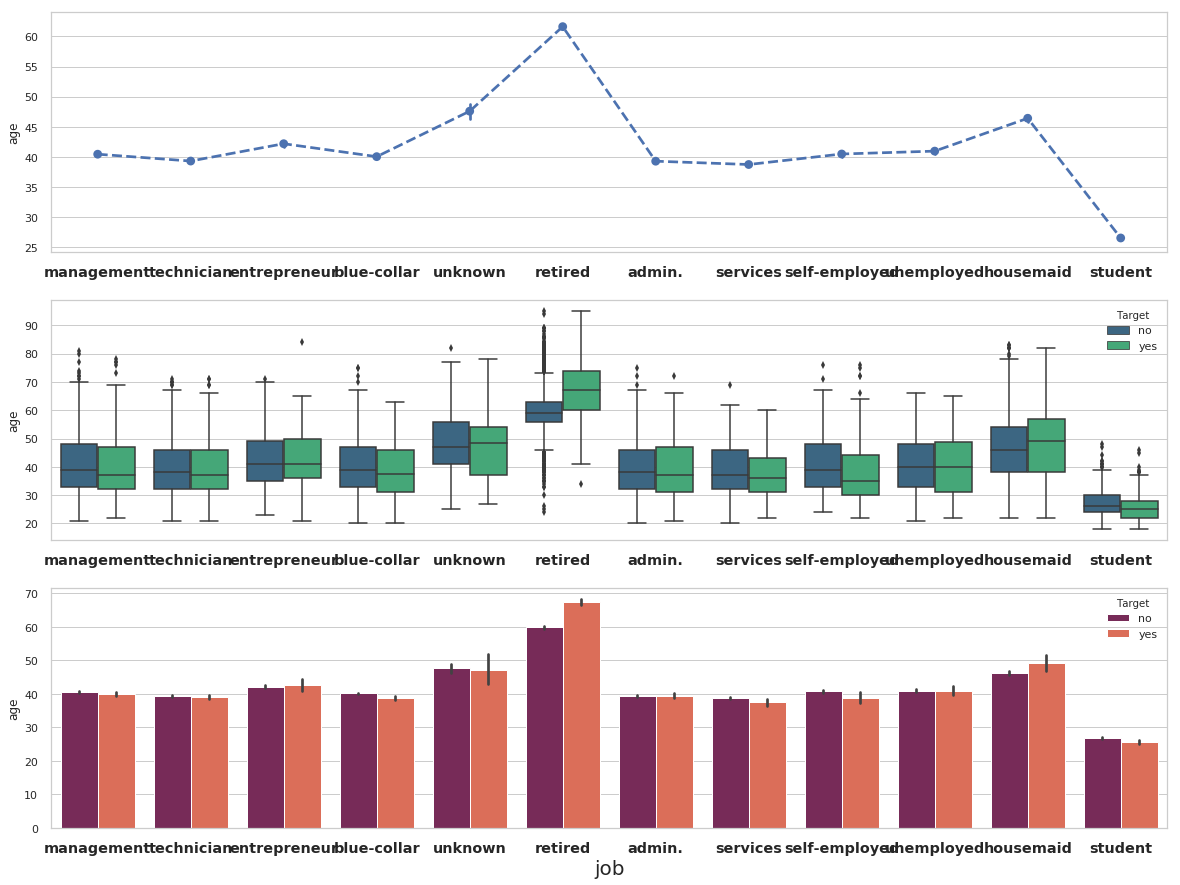

In [21]:
point_box_bar_plot('job', 'age', 'Target', 20, 15)

#### Observations
As it is obvious, **retired** customers have highest age and **students** have lowest age. However all the other jobs have a mean age of around 40.

**retired** and **housemaid** are the jobs where customers with slightly higher age have availed term deposit subscription.

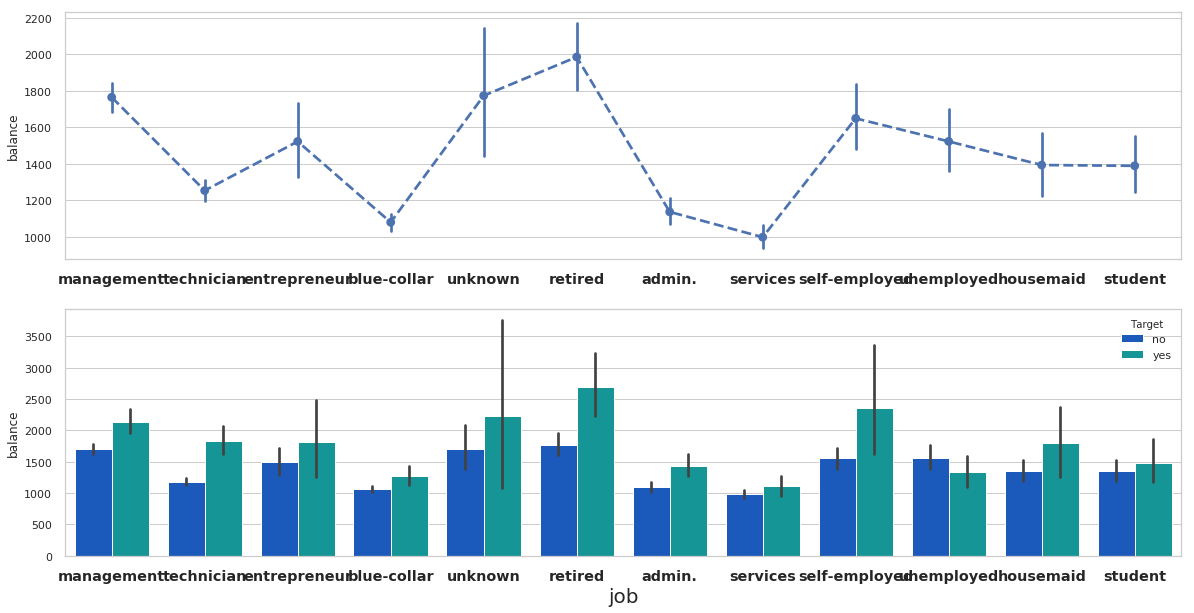

In [22]:
point_bar_plot('job', 'balance', 'Target', 20, 10, palette='winter')

#### Observations
1. Customers who are **retired** have highest yearly balance.
2. Customers with **management** or **self-employed** jobs also have higher yearly balance.
3. Customers with **blue-collar**, **admin**, **services** jobs have lower yearly balance.
4. Except customers who are **unemployed**, all others have higher term deposit subscription ratio.

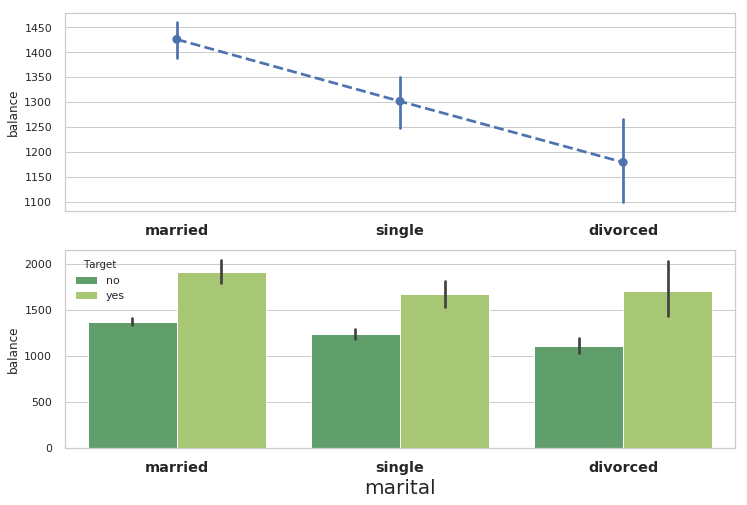

In [23]:
point_bar_plot('marital', 'balance', 'Target', 12, 8, palette='summer')

#### Observations
1. Customers who are **married** have highest yearly balance, followed by customers who are **single** and **divorced**.
2. Customers from all **marital** classes have higher term deposit subscription ratio with **married** being slightly higher.

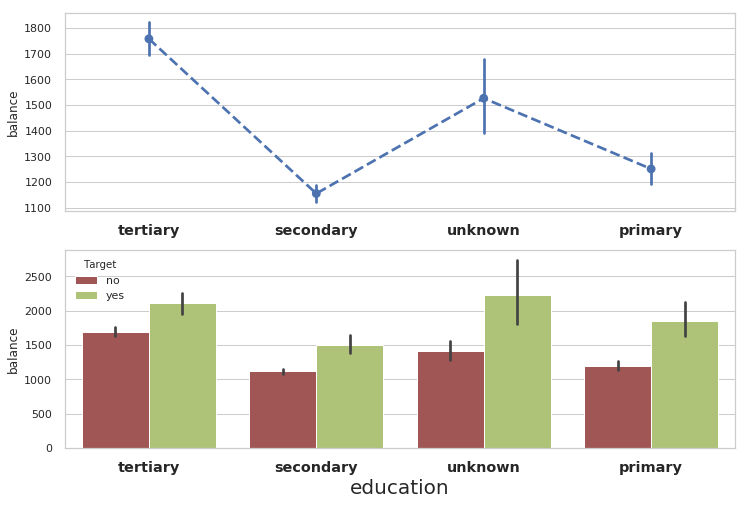

In [24]:
point_bar_plot('education', 'balance', 'Target', 12, 8, palette='tab20b_r')

#### Observations
1. Customers with **tertiary** education have higher yearly balance.
2. Customers with **primary** education have higher yearly balance as compared to those with **secondary** education, which is unusual.
2. Customers from all **education** classes have higher term deposit subscription ratio.

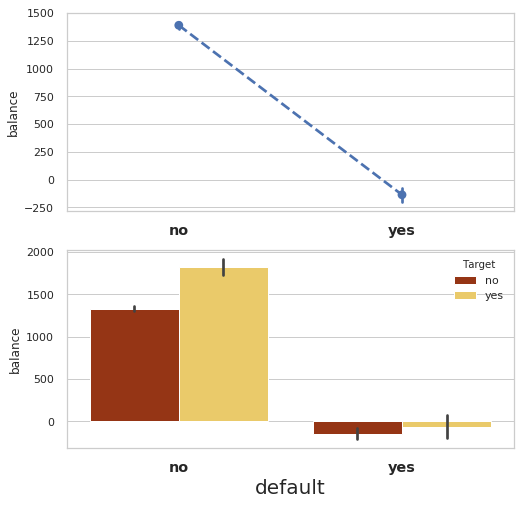

In [25]:
point_bar_plot('default', 'balance', 'Target', 8, 8, palette='afmhot')

#### Observations
Customers with **negative balance** have credit defaults.

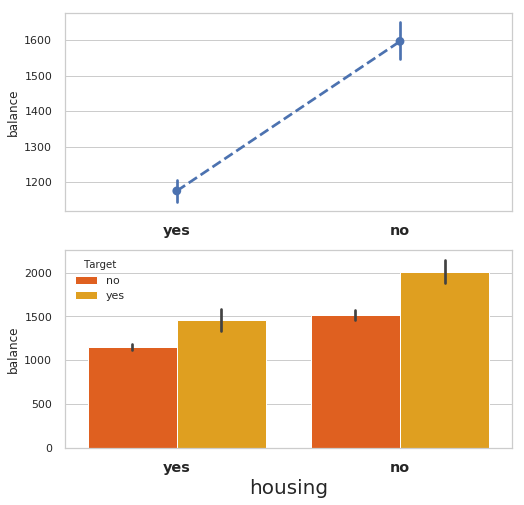

In [26]:
point_bar_plot('housing', 'balance', 'Target', 8, 8, palette='autumn')

#### Observations
Customers with no housing loans have higher yearly balance and noticeably having higher term deposit subscriptions.

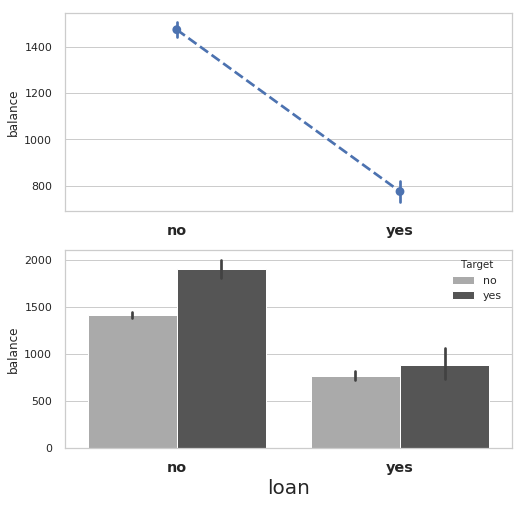

In [27]:
point_bar_plot('loan', 'balance', 'Target', 8, 8, palette='binary')

#### Observations
Customers with no personal loans have higher yearly balance and noticeably having higher term deposit subscriptions.

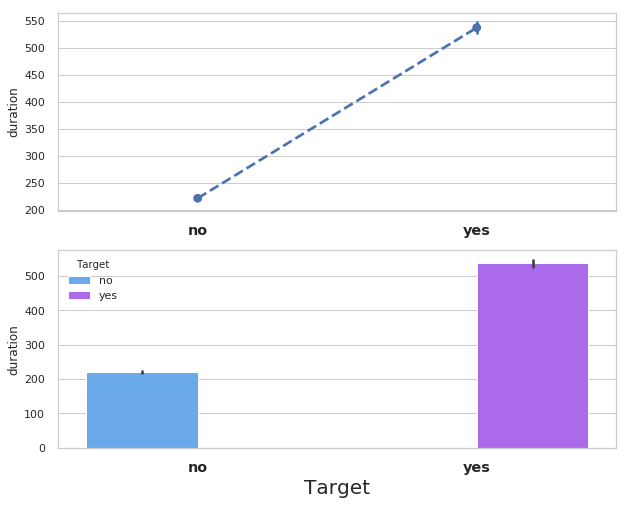

In [28]:
point_bar_plot('Target', 'duration', 'Target', 10, 8, palette='cool')

#### Observations
Higher the duration of last contact, higher is the subscription.

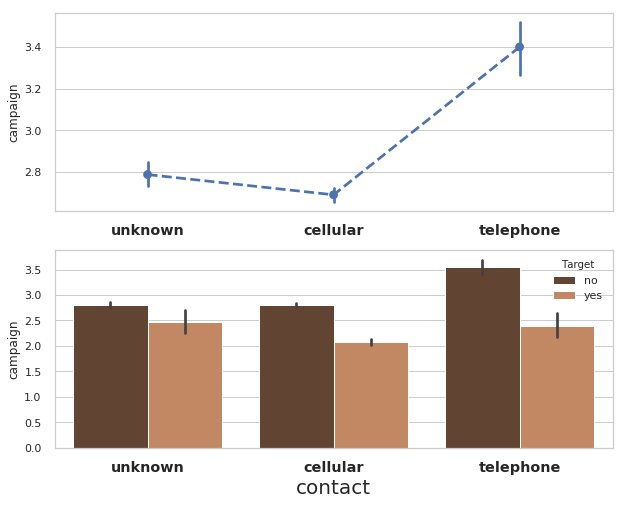

In [29]:
point_bar_plot('contact', 'campaign', 'Target', 10, 8, palette='copper')

#### Observations
Customers with communication type as **telephone** are contacted more number of times during the current campaign, however ratio of term deposit subscription is lower. 

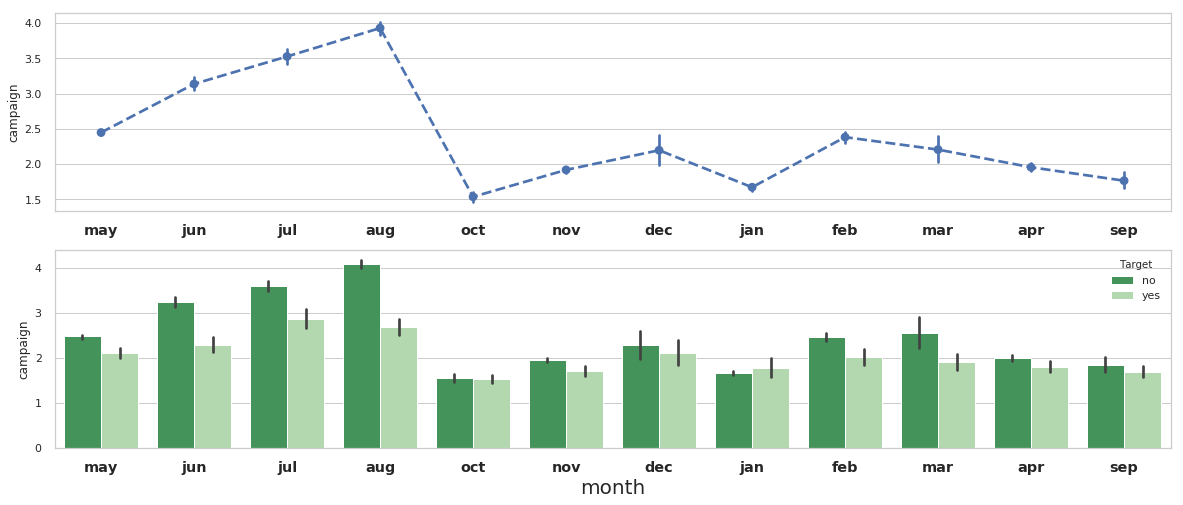

In [30]:
point_bar_plot('month', 'campaign', 'Target', 20, 8, palette='Greens_r')

#### Observations
Customers have higher contacts during the month of July and August and lesser contacts during January, September, October

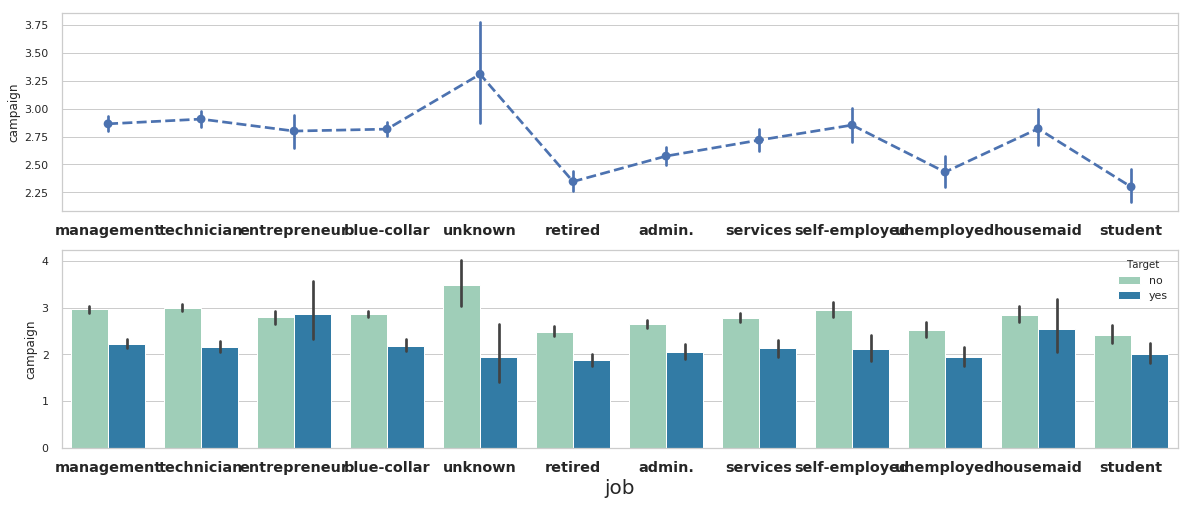

In [31]:
point_bar_plot('job', 'campaign', 'Target', 20, 8, palette='YlGnBu')

#### Observations
Customers who are **retired**, **students**, **unemployed** have been contact less number of times

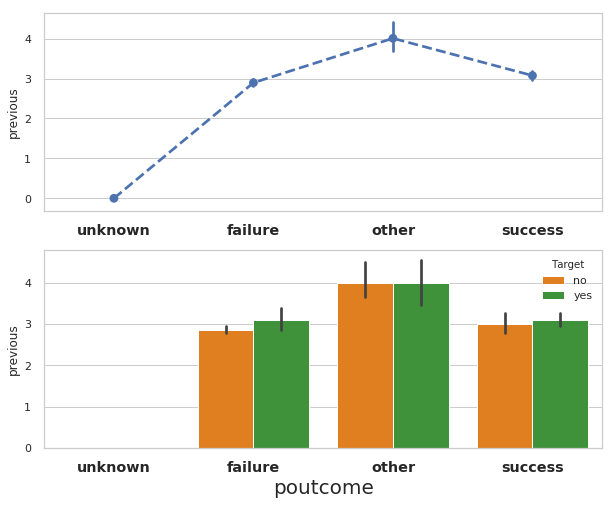

In [32]:
point_bar_plot('poutcome', 'previous', 'Target', 10, 8, palette='Paired_r')

#### Observations
Highest number of contacts are made for **other** outcomes for the previous campaign.
Data is ditributed almost equally for **success** and **failure** outcomes for the previous campaign

## Multivariate Analysis

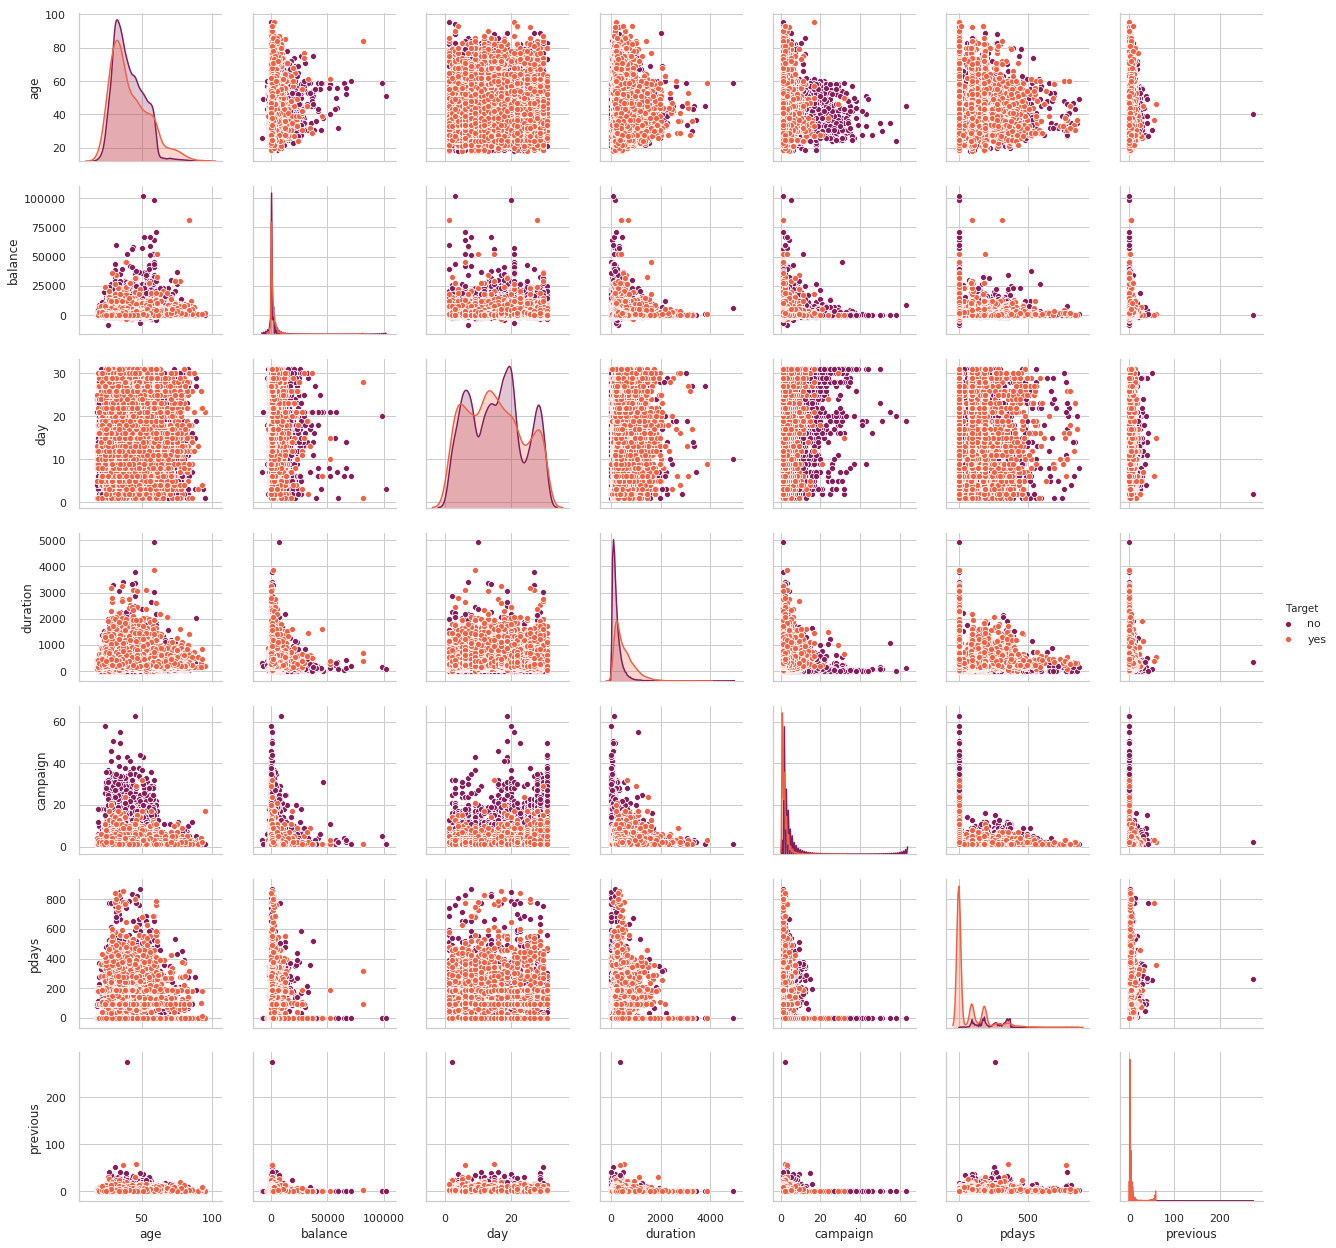

In [33]:
sns.pairplot(bank, hue='Target', diag_kind = 'kde', palette='rocket')

In [34]:
bank.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

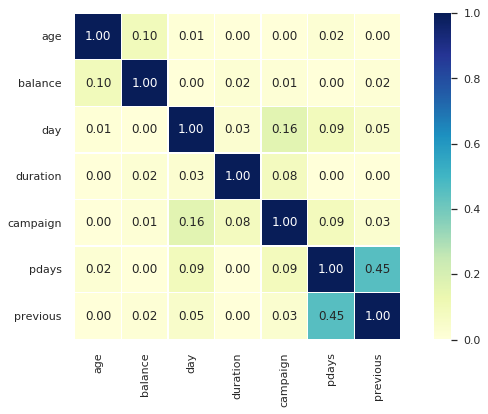

In [35]:
f, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(bank.corr().abs(), cmap='YlGnBu', annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.3, square=True)

#### Observations
As per the plot above, all the attributes are scattered randomly.
There are no correlation between any of the numeric attributes except a partial correlation between **pdays** and **previous**

## Data Preprocessing

### Dropping records with unknown jobs

In [36]:
bank.drop(bank[bank.job == 'unknown'].index, axis=0, inplace=True)
bank.shape

(44923, 17)

### Dropping records with unknown education

In [37]:
bank.drop(bank[bank.education == 'unknown'].index, axis=0, inplace=True)
bank.shape

(43193, 17)

In [38]:
catdist(['Target', 'default', 'housing', 'loan', 'marital', 'contact', 'education', 'poutcome', 'job', 'month'])

Target 
 % 
 
 
 
 
 no 
 38172 
 88.38 
 
 
 yes 
 5021 
 11.62 
 
 
 
 
 
 
 default 
 % 
 
 
 
 
 no 
 42411 
 98.19 
 
 
 yes 
 782 
 1.81 
 
 
 
 
 
 
 housing 
 % 
 
 
 
 
 yes 
 24292 
 56.24 
 
 
 no 
 18901 
 43.76 
 
 
 
 
 
 
 loan 
 % 
 
 
 
 
 no 
 36086 
 83.55 
 
 
 yes 
 7107 
 16.45 
 
 
 
 
 
 
 marital 
 % 
 
 
 
 
 married 
 25946 
 60.07 
 
 
 single 
 12219 
 28.29 
 
 
 divorced 
 5028 
 11.64 
 
 
 
 
 
 
 contact 
 % 
 
 
 
 
 cellular 
 28213 
 65.32 
 
 
 unknown 
 12286 
 28.44 
 
 
 telephone 
 2694 
 6.24 
 
 
 
 
 
 
 education 
 % 
 
 
 
 
 secondary 
 23131 
 53.55 
 
 
 tertiary 
 13262 
 30.70 
 
 
 primary 
 6800 
 15.74 
 
 
 
 
 
 
 poutcome 
 % 
 
 
 
 
 unknown 
 35286 
 81.69 
 
 
 failure 
 4709 
 10.90 
 
 
 other 
 1774 
 4.11 
 
 
 success 
 1424 
 3.30 
 
 
 
 
 
 
 job 
 % 
 
 
 
 
 blue-collar 
 9278 
 21.48 
 
 
 management 
 9216 
 21.34 
 
 
 technician 
 7355 
 17.03 
 
 
 admin. 
 5000 
 11.58 
 
 
 services 
 4004 
 9.27 
 
 
 retired 
 2145 
 4.97 
 
 
 self-employed 
 1540 
 3.57 
 
 
 entrepreneur 
 1411 
 3.27 
 
 
 unemployed 
 1274 
 2.95 
 
 
 housemaid 
 1195 
 2.77 
 
 
 student 
 775 
 1.79 
 
 
 
 
 
 
 month 
 % 
 
 
 
 
 may 
 13192 
 30.54 
 
 
 jul 
 6601 
 15.28 
 
 
 aug 
 6037 
 13.98 
 
 
 jun 
 4980 
 11.53 
 
 
 nov 
 3842 
 8.89 
 
 
 apr 
 2820 
 6.53 
 
 
 feb 
 2533 
 5.86 
 
 
 jan 
 1318 
 3.05 
 
 
 oct 
 690 
 1.60 
 
 
 sep 
 532 
 1.23 
 
 
 mar 
 448 
 1.04 
 
 
 dec 
 200 
 0.46

### Dropping duration, default and day attributes
**duration** cannot be known before a call is made. Only at the end
of the call duration is known and as is target. So this feature is removed as recommended

**default** attribute is highly skewed with 98.19% "No" values and hence it will no add any value in prediction

**day** does not have any significant impact on the target

In [39]:
bank.drop(['duration','default', 'day'], axis=1, inplace=True)
bank.shape

(43193, 14)

### Removing Outliers

In [40]:
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)

In [41]:
remove_outliers('balance', bank)

(709, 15)


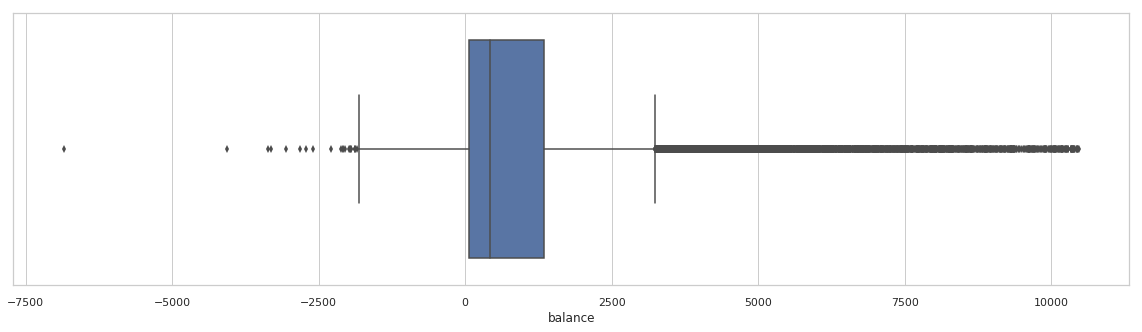

In [42]:
f, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.boxplot(bank['balance'], ax =axes)

In [43]:
remove_outliers('pdays', bank)

(1581, 15)


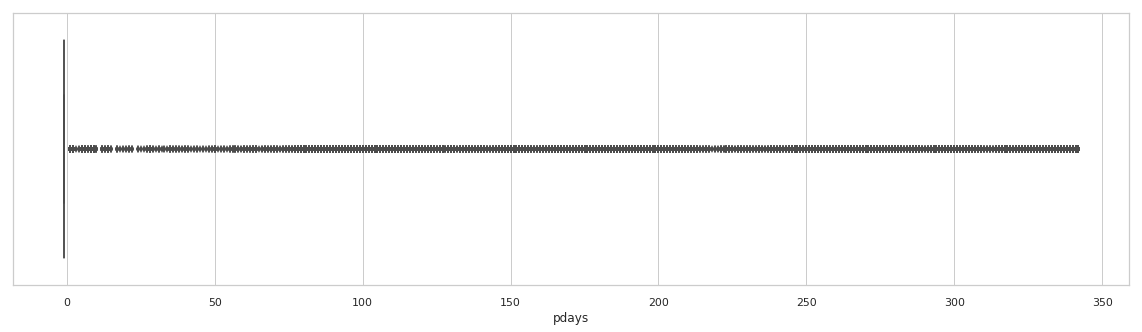

In [44]:
f, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.boxplot(bank['pdays'], ax =axes)

In [45]:
remove_outliers('previous', bank)

(474, 15)


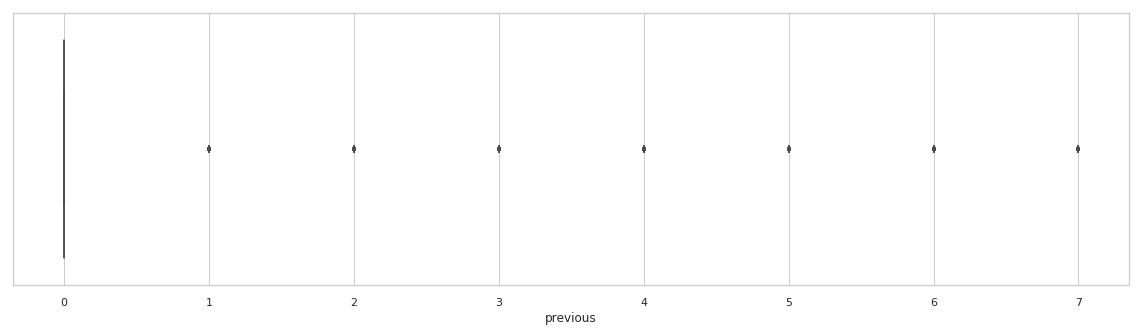

In [46]:
f, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.boxplot(bank['previous'], ax =axes)

### One-hot encoding all the categorical attributes

In [47]:
bank_enc= pd.get_dummies(bank, prefix=['job','marital','education','contact','month','poutcome'], columns=['job','marital','education','contact','month','poutcome'])

In [48]:
bank_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40429 entries, 0 to 45209
Data columns (total 44 columns):
age                    40429 non-null int64
balance                40429 non-null int64
housing                40429 non-null object
loan                   40429 non-null object
campaign               40429 non-null int64
pdays                  40429 non-null int64
previous               40429 non-null int64
Target                 40429 non-null object
job_admin.             40429 non-null uint8
job_blue-collar        40429 non-null uint8
job_entrepreneur       40429 non-null uint8
job_housemaid          40429 non-null uint8
job_management         40429 non-null uint8
job_retired            40429 non-null uint8
job_self-employed      40429 non-null uint8
job_services           40429 non-null uint8
job_student            40429 non-null uint8
job_technician         40429 non-null uint8
job_unemployed         40429 non-null uint8
marital_divorced       40429 non-null uint8
marital_

### Dropping redundant features as the information will be obtained from other classes

In [49]:
bank_enc.drop(['job_student','marital_divorced', 'education_primary', 'contact_telephone', 'month_dec', 'poutcome_success'], 
                  axis=1, inplace=True)

### Label encoding binary attributes

In [50]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

def lencode(col):
    labelencoder = LabelEncoder()
    bank_enc[col] = labelencoder.fit_transform(bank_enc[col]) # returns label encoded variable(s)
    return bank_enc

In [51]:
bank_enc = lencode('housing')
bank_enc = lencode('loan')
bank_enc = lencode('Target')

### Convert the numeric data to same scale so variables which are of different units are given equal importance

In [52]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
bank_enc[['age', 'balance', 'campaign','pdays','previous']] = std_scale.fit_transform(bank_enc[['age', 'balance', 'campaign','pdays','previous']])

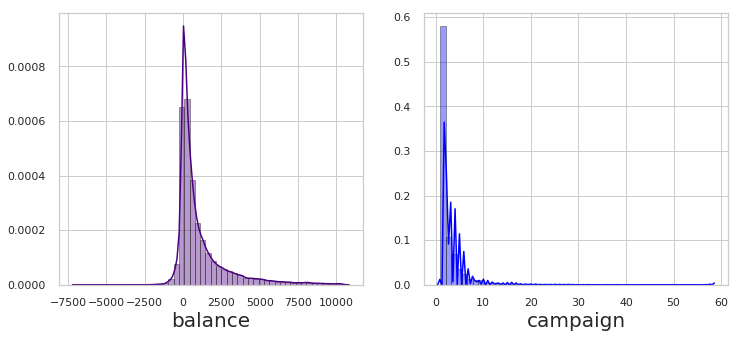

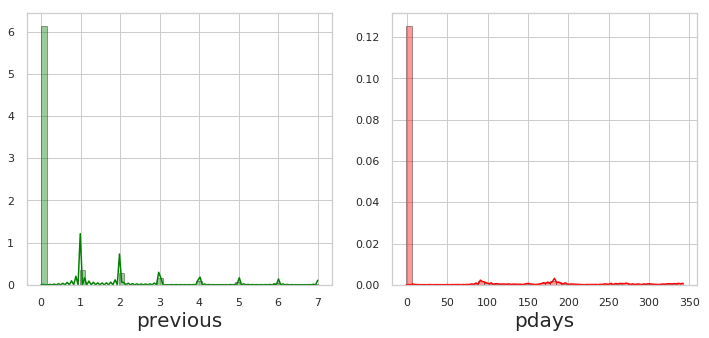

In [53]:
distplot(1,2, 12,5, 
         ['balance', 'campaign'], 
         ['indigo', 'blue'])

distplot(1,2, 12, 5, 
         ['previous', 'pdays'], 
         ['green', 'red'])

### Measuring the skewness of numeric attributes

In [54]:
bank_enc[['balance', 'campaign','pdays','previous']].skew()

balance     2.434397
campaign    4.777409
pdays       2.803868
previous    3.644843
dtype: float64

### Applying log transformation to reduce the skewness

In [55]:
def lognew(a):    
    a = np.array(a)
    x = np.min(a)
    a = a + 1 - x
    return np.log1p(a)

In [56]:
from sklearn.preprocessing import FunctionTransformer  
log_transformer = FunctionTransformer(lognew)
bank_enc[['balance', 'campaign','pdays','previous']] = log_transformer.fit_transform(bank_enc[['balance', 'campaign','pdays','previous']])

In [57]:
bank_enc[['balance', 'campaign','pdays','previous']].skew()

balance     1.934252
campaign    3.120664
pdays       2.631681
previous    3.214383
dtype: float64

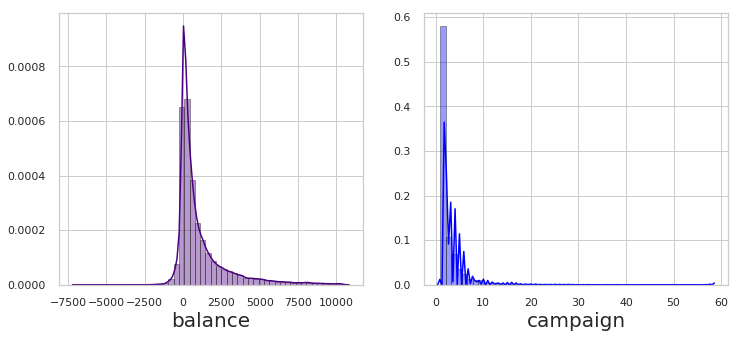

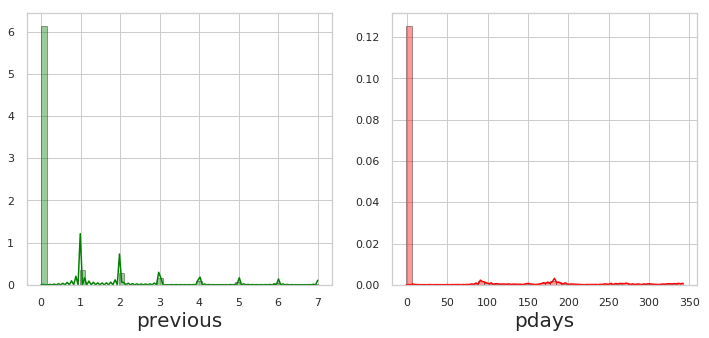

In [58]:
distplot(1,2, 12,5, 
         ['balance', 'campaign'], 
         ['indigo', 'blue'])

distplot(1,2, 12, 5, 
         ['previous', 'pdays'], 
         ['green', 'red'])

In [59]:
def fit_n_score(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs    
    model.fit(X_train, y_train)   # fit the model with the train data
    
    iterables = [[type(model).__name__], ['Training', 'Testing']]
    
    multiIndex = pd.MultiIndex.from_product(iterables, names=['Algorithm', 'DataSet'])

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #get Precision Score on train and test
    accuracy_train = round(metrics.accuracy_score(y_train, y_train_pred),3)
    accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred),3)
    accdf = pd.DataFrame([[accuracy_train],[accuracy_test]], index=multiIndex, columns=['Accuracy'])    

    #get Precision Score on train and test
    precision_train = round(metrics.precision_score(y_train, y_train_pred),3)
    precision_test = round(metrics.precision_score(y_test, y_test_pred),3)
    precdf = pd.DataFrame([[precision_train],[precision_test]], index=multiIndex, columns=['Precision'])

    #get Recall Score on train and test
    recall_train = round(metrics.recall_score(y_train, y_train_pred),3)
    recall_test = round(metrics.recall_score(y_test, y_test_pred),3)
    recdf = pd.DataFrame([[recall_train],[recall_test]], index=multiIndex, columns=['Recall'])    

    #get F1-Score on train and test
    f1_score_train = round(metrics.f1_score(y_train, y_train_pred),3)
    f1_score_test = round(metrics.f1_score(y_test, y_test_pred),3)
    f1sdf = pd.DataFrame([[f1_score_train],[f1_score_test]], index=multiIndex, columns=['F1 Score'])   
    
    consolidatedDF= pd.concat([accdf, precdf,recdf, f1sdf], axis=1)
    
    confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])   
    
    display_side_by_side([consolidatedDF, confusion_matrix_test])
    
    return consolidatedDF, confusion_matrix_test
    

In [60]:
# function for model fitting, prediction and calculating different scores
def Modelling_Prediction_Scores(model ,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    #predict on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #predict the probabilities on train and test
    y_train_pred_proba = model.predict_proba(X_train) 
    y_test_pred_proba = model.predict_proba(X_test)

    #get Accuracy Score for train and test
    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])    

    #get Precision Score on train and test
    precision_train = metrics.precision_score(y_train, y_train_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

    #get Recall Score on train and test
    recall_train = metrics.recall_score(y_train, y_train_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

    #get F1-Score on train and test
    f1_score_train = metrics.f1_score(y_train, y_train_pred)
    f1_score_test = metrics.f1_score(y_test, y_test_pred)
    f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

    #get Area Under the Curve (AUC) for ROC Curve on train and test
    roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
    roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
    rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

    #get Area Under the Curve (AUC) for Precision-Recall Curve on train and test
    precision_train, recall_train, thresholds_train = metrics.precision_recall_curve(y_train, y_train_pred_proba[:,1])
    precision_recall_auc_score_train = metrics.auc(recall_train, precision_train)
    precision_test, recall_test, thresholds_test = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
    precision_recall_auc_score_test = metrics.auc(recall_test, precision_test)
    precrecaucsdf = pd.DataFrame([[precision_recall_auc_score_train, precision_recall_auc_score_test]], columns=['Training', 'Testing'], index=['Precision Recall AUC Score'])

    #calculate the confusion matrix 
    #print('tn, fp, fn, tp')
    confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

    #display confusion matrix in a heatmap
    f, axes = plt.subplots(1, 2, figsize=(20, 8))
    hmap = sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0], )
    hmap.set_xlabel('Predicted', fontsize=15)
    hmap.set_ylabel('Actual', fontsize=15)

    #plotting the ROC Curve and Precision-Recall Curve
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
    plt.plot(fpr, tpr, marker='.', label='ROC Curve')
    plt.plot(recall_test, precision_test, marker='.', label='Precision Recall Curve')
    plt.axes(axes[1])
    plt.title(type(model).__name__, fontsize=15)
    # axis labels
    plt.xlabel('ROC Curve - False Positive Rate \n Precision Recall Curve - Recall', fontsize=15)    
    plt.ylabel('ROC Curve - True Positive Rate \n Precision Recall Curve - Precision', fontsize=15)
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    #concatenating all the scores and displaying as single dataframe
    consolidatedDF= pd.concat([accdf, precdf,recdf,f1sdf, rocaucsdf, precrecaucsdf])

    printmd('**Confusion Matrix**', color='brown')
    display_side_by_side([confusion_matrix_test, consolidatedDF])
    
    return confusion_matrix_test, consolidatedDF

### Split the data into training and test set in the ratio of 70:30 respectively

In [61]:
X = bank_enc.loc[:, bank_enc.columns != 'Target']
y = bank_enc['Target']

In [62]:
printmd('**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**', color='brown')
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size =.30, random_state=1)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

printmd('**Original Set Target Value Distribution**', color='brown')

print("Original Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(bank_enc.loc[bank_enc['Target'] == 1]), (len(bank_enc.loc[bank_enc['Target'] == 1])/len(bank_enc.index)) * 100))
print("Original Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(bank_enc.loc[bank_enc['Target'] == 0]), (len(bank_enc.loc[bank_enc['Target'] == 0])/len(bank_enc.index)) * 100))

printmd('**Training Set Target Value Distribution**', color='brown')

print("Training Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

printmd('**Testing Set Target Value Distribution**', color='brown')
print("Test Personal Loan '1' Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan '0' Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


<span style='color:brown'>**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**</span>

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 28300 rows and 37 columns
Testing set has 12129 rows and 37 columns


<span style='color:brown'>**Original Set Target Value Distribution**</span>

Original Personal Loan '1' Values    : 4536 (11.22%)
Original Personal Loan '0' Values   : 35893 (88.78%)


<span style='color:brown'>**Training Set Target Value Distribution**</span>

Training Personal Loan '1' Values    : 3175 (11.22%)
Training Personal Loan '0' Values   : 25125 (88.78%)


<span style='color:brown'>**Testing Set Target Value Distribution**</span>

Test Personal Loan '1' Values        : 1361 (11.22%)
Test Personal Loan '0' Values       : 10768 (88.78%)


### Upsampling minority class to add another 10000 records

In [63]:
# We do upsampling only from the train dataset to preserve the sanctity of the test data
y_train_0 = y_train[y_train == 0]

extra_samples = y_train[y_train == 1].sample(10000,replace = True, random_state=1).index # Generate duplicate samples
y_train = y_train.append(y_train.loc[extra_samples])  # use the index of the duplicate samples to append to the y_train

extra_samples = X_train.loc[extra_samples]   # use the same index to generate duplicate rows in X_train
X_train = X_train.append(extra_samples)  # append these duplicate rows to X_train

In [64]:
printmd('**Training Set Target Value Distribution**', color='brown')

print("Training Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

printmd('**Testing Set Target Value Distribution**', color='brown')
print("Test Personal Loan '1' Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan '0' Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

<span style='color:brown'>**Training Set Target Value Distribution**</span>

Training Personal Loan '1' Values    : 13175 (34.40%)
Training Personal Loan '0' Values   : 25125 (65.60%)


<span style='color:brown'>**Testing Set Target Value Distribution**</span>

Test Personal Loan '1' Values        : 1361 (11.22%)
Test Personal Loan '0' Values       : 10768 (88.78%)


### Downsampling majority class to 20000 records to improve performance

In [65]:
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
train_data.shape

# separate minority and majority classes
negative = train_data[train_data.Target==0]
positive = train_data[train_data.Target==1]

df_majority_downsampled = resample(negative,
 replace=False, # sample without replacement
 n_samples=20000, # match number in minority class
 random_state=1) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([positive, df_majority_downsampled])
# check new class counts
downsampled.Target.value_counts()
X_train = downsampled.loc[:, downsampled.columns != 'Target']
y_train = downsampled['Target']

In [66]:
printmd('**Training Set Target Value Distribution**', color='brown')

print("Training Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

printmd('**Testing Set Target Value Distribution**', color='brown')
print("Test Personal Loan '1' Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan '0' Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

<span style='color:brown'>**Training Set Target Value Distribution**</span>

Training Personal Loan '1' Values    : 13175 (39.71%)
Training Personal Loan '0' Values   : 20000 (60.29%)


<span style='color:brown'>**Testing Set Target Value Distribution**</span>

Test Personal Loan '1' Values        : 1361 (11.22%)
Test Personal Loan '0' Values       : 10768 (88.78%)


#### we have approximately 60%-40% distribution of 0s and 1s respectively which is fairly better than 88%-12% distribution we had initially

## Standard Classifiers

### Logistic Regression

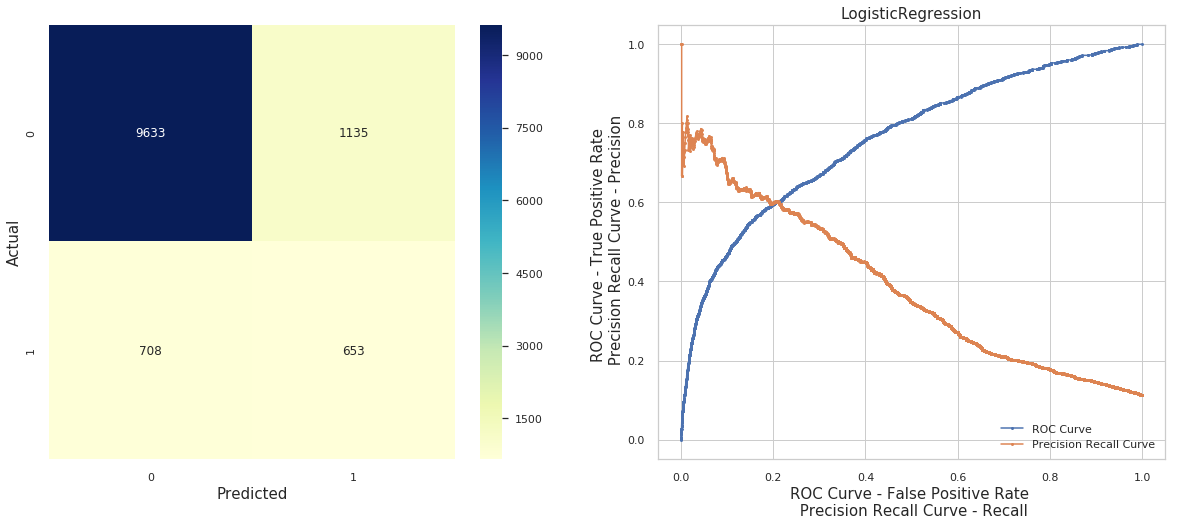

<span style='color:brown'>**Confusion Matrix**</span>

Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9633 
 1135 
 
 
 1 
 708 
 653 
 
 
 
 
 
 
 Training 
 Testing 
 
 
 
 
 Accuracy 
 0.738568 
 0.848050 
 
 
 Precision 
 0.764202 
 0.365213 
 
 
 Recall 
 0.494194 
 0.479794 
 
 
 F1 Score 
 0.600230 
 0.414735 
 
 
 ROC AUC Score 
 0.696872 
 0.687195 
 
 
 Precision Recall AUC Score 
 0.720721 
 0.385528

In [67]:
logRegModel = LogisticRegression(n_jobs=-1)
cmLR, dfLR = Modelling_Prediction_Scores(logRegModel, X_train, X_test, y_train, y_test)

#### Observations

1. Type-I Error (FP) = 1131
2. Type-II Error (FN) = 710
3. **Accuracy** is high, above 84%. 
4. Though **Accuracy** is higher, we need to look at Precision, Recall and AUC under Precision-Recall Curve since the target variable is imbalaced. 
5. ROC Curve looks slightly good but Precision-Recall curve does not look good with AUC score of 0.38. 
6. Looking at the values of Precision(0.36), Recall(0.47) and AUC(0.38), this does not looks like a good model. 


### Naive Bayes

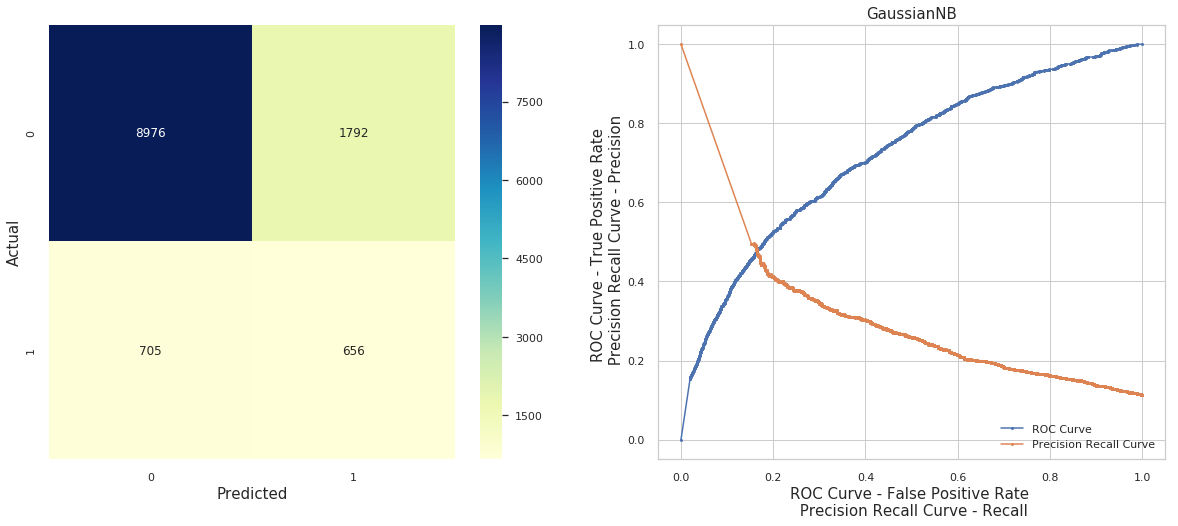

<span style='color:brown'>**Confusion Matrix**</span>

Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8976 
 1792 
 
 
 1 
 705 
 656 
 
 
 
 
 
 
 Training 
 Testing 
 
 
 
 
 Accuracy 
 0.696157 
 0.794130 
 
 
 Precision 
 0.657924 
 0.267974 
 
 
 Recall 
 0.489336 
 0.481999 
 
 
 F1 Score 
 0.561243 
 0.344447 
 
 
 ROC AUC Score 
 0.660868 
 0.657790 
 
 
 Precision Recall AUC Score 
 0.651803 
 0.321635

In [68]:
gnb = GaussianNB()
cmNB, dfNB = Modelling_Prediction_Scores(gnb, X_train, X_test, y_train, y_test)

#### Observations

1. Type-I Error (FP) = 1853
2. Type-II Error (FN) = 662
3. **Accuracy** differs significantly between traing and test sets.
4. ROC Curve looks slightly good but Precision-Recall curve does not look good with AUC score of 0.32. 
5. Looking at the values of Precision(0.26), Recall(0.48) and AUC(0.32), this does not looks like a good model. 

### KNN

In [69]:
#plot the f1-scores for different values of k for a model and see which is optimal
def Optimal_k_Plot(model, X_train, X_test, y_train, y_test):
    # creating odd list of K for KNN
    myList = list(range(3,20))

    # subsetting just the odd ones
    klist = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold accuracy scores
    scores = []

    # perform accuracy metrics for values from 3,5....19
    for k in klist:        
        model.n_neighbors = k
        model.fit(X_train, y_train)
        # predict the response
        y_test_pred = knn.predict(X_test)        
        test_score= metrics.accuracy_score(y_test, y_test_pred)
        scores.append(test_score)

    # determining best k
    optimal_k = klist[scores.index(max(scores))]
    print("The optimal number of neighbors is %d" % optimal_k)

    import matplotlib.pyplot as plt
    # plot misclassification error vs k
    plt.plot(klist, scores)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Score')
    plt.show()

The optimal number of neighbors is 19


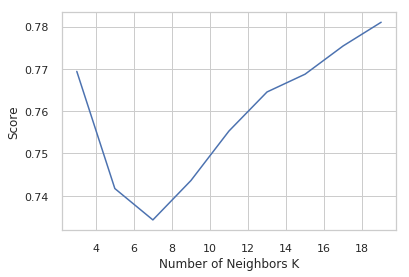

In [70]:
knn = KNeighborsClassifier(n_jobs=-1)
Optimal_k_Plot(knn, X_train, X_test, y_train, y_test)

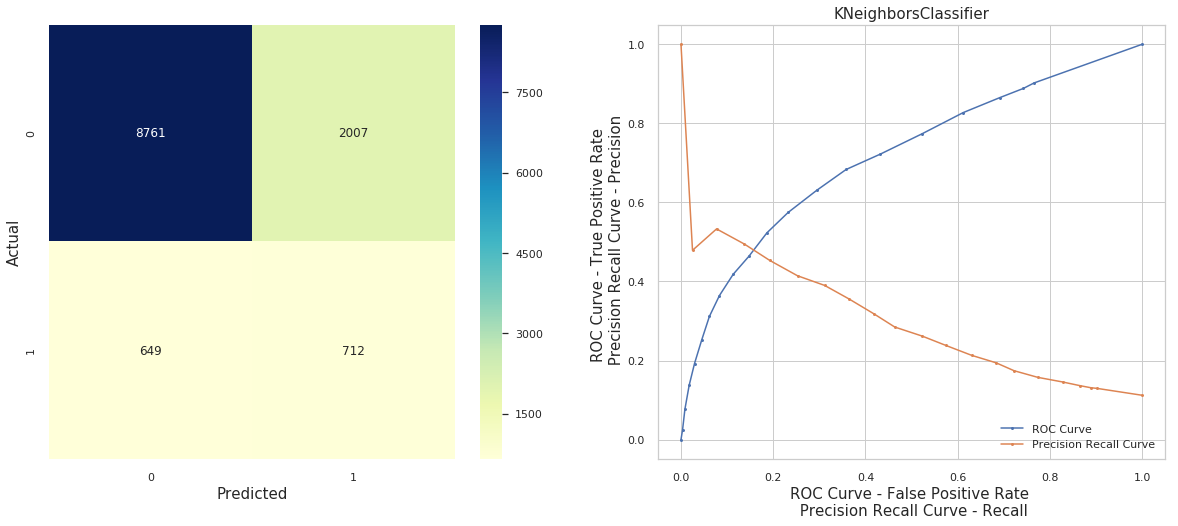

<span style='color:brown'>**Confusion Matrix**</span>

Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8761 
 2007 
 
 
 1 
 649 
 712 
 
 
 
 
 
 
 Training 
 Testing 
 
 
 
 
 Accuracy 
 0.779081 
 0.781021 
 
 
 Precision 
 0.738223 
 0.261861 
 
 
 Recall 
 0.687514 
 0.523145 
 
 
 F1 Score 
 0.711967 
 0.349020 
 
 
 ROC AUC Score 
 0.763457 
 0.668380 
 
 
 Precision Recall AUC Score 
 0.806858 
 0.301718

In [71]:
knn = KNeighborsClassifier(n_neighbors=19, n_jobs=-1)
cmKNN, dfKNN = Modelling_Prediction_Scores(knn, X_train, X_test, y_train, y_test)

#### Observations

1. Type-I Error (FP) = 2007
2. Type-II Error (FN) = 712
3. **Accuracy** is almost equal between train and test sets around 78%.
4. ROC Curve looks good with AUC of 0.67 and Precision-Recall curve does not look good with AUC score of 0.30. 
5. Looking at the values of Precision(0.26), Recall(0.52) and AUC(0.30), this does not looks like a good model. 

### Iteration-1

In [72]:
lr = LogisticRegression(C=0.1) 
lrDf, lrCm = fit_n_score(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knnDf, knnCm = fit_n_score(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nbDf, nbCm = fit_n_score(nb, X_train, X_test, y_train, y_test)

svm = SVC(gamma='auto')
svmDf, svmCm = fit_n_score(svm, X_train, X_test, y_train, y_test)

result1 = pd.concat([lrDf,knnDf,nbDf,svmDf])

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 LogisticRegression 
 Training 
 0.736 
 0.759 
 0.491 
 0.597 
 
 
 Testing 
 0.849 
 0.368 
 0.478 
 0.416 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9652 
 1116 
 
 
 1 
 710 
 651

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 KNeighborsClassifier 
 Training 
 0.935 
 0.863 
 0.995 
 0.925 
 
 
 Testing 
 0.769 
 0.230 
 0.450 
 0.304 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8720 
 2048 
 
 
 1 
 749 
 612

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 GaussianNB 
 Training 
 0.696 
 0.658 
 0.489 
 0.561 
 
 
 Testing 
 0.794 
 0.268 
 0.482 
 0.344 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8976 
 1792 
 
 
 1 
 705 
 656

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 SVC 
 Training 
 0.739 
 0.828 
 0.433 
 0.568 
 
 
 Testing 
 0.880 
 0.463 
 0.411 
 0.436 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 10118 
 650 
 
 
 1 
 801 
 560

#### Observations

1. All the classifiers have lower values for Precision, Recall and F1-Score. 
2. KNN seems to perform well on training set but poorly on test sets.
3. Support Vector Machine having a good Accuracy of 88% and better F1-score (0.436) compared to other classifiers 

### Iteration-2

In [73]:
lr = LogisticRegression(C=0.1, class_weight='balanced')  
lrDf, lrCm = fit_n_score(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knnDf, knnCm = fit_n_score(knn, X_train, X_test, y_train, y_test)

svm = SVC(gamma='auto', C=0.1)
svmDf, svmCm = fit_n_score(svm, X_train, X_test, y_train, y_test)

result2 = pd.concat([lrDf,knnDf,svmDf])

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 LogisticRegression 
 Training 
 0.717 
 0.645 
 0.639 
 0.642 
 
 
 Testing 
 0.747 
 0.250 
 0.626 
 0.357 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8206 
 2562 
 
 
 1 
 509 
 852

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 KNeighborsClassifier 
 Training 
 0.935 
 0.863 
 0.995 
 0.925 
 
 
 Testing 
 0.769 
 0.230 
 0.450 
 0.304 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 8720 
 2048 
 
 
 1 
 749 
 612

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 SVC 
 Training 
 0.730 
 0.813 
 0.415 
 0.549 
 
 
 Testing 
 0.875 
 0.439 
 0.404 
 0.421 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 10066 
 702 
 
 
 1 
 811 
 550

#### Observations

1. All the classifiers have lower values for Precision, Recall and F1-Score. 
2. Logistic Regression have improved on Recall but a let down on Precision and hence low F1-score.
2. KNN has overfit on training data.
3. Support Vector Machine having a good Accuracy of 88% and better F1-score (0.42) compared to other classifiers 

In [74]:
from sklearn.model_selection import GridSearchCV

def find_best_model(model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy')
    clf.fit(X_train, y_train)             
    print(clf.best_score_)
    print(clf.best_params_)
    print(clf.best_estimator_)
    return clf

### Decision Tree

In [75]:
dTree= DecisionTreeClassifier()
dTreeDf, dTreeCm = fit_n_score(dTree, X_train, X_test, y_train, y_test)
result3  = dTreeDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 DecisionTreeClassifier 
 Training 
 1.000 
 1.000 
 1.000 
 1.000 
 
 
 Testing 
 0.815 
 0.245 
 0.312 
 0.275 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9460 
 1308 
 
 
 1 
 936 
 425

### Find the best model using the gridsearch

In [76]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 10], 'max_features':(None,'auto')}
clf = find_best_model(dTree, parameters)

0.7517407686510927
{'criterion': 'gini', 'max_depth': 10, 'max_features': None}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [77]:
dTree2 = clf.best_estimator_
dTreeDf, dTreeCm = fit_n_score(dTree2, X_train, X_test, y_train, y_test)
dTreeDf
result4 = dTreeDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 DecisionTreeClassifier 
 Training 
 0.762 
 0.822 
 0.513 
 0.632 
 
 
 Testing 
 0.857 
 0.374 
 0.411 
 0.392 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9829 
 939 
 
 
 1 
 801 
 560

#### Observations

**result4** is better than **result3** as have used the best model using grid search with improvements in **Accuracy (86%)**, **Precision**, **Recall**, **F1-score** values


## Ensemble Classifiers

### Bagging

In [78]:
bagging = BaggingClassifier()
baggingDf, baggingCm = fit_n_score(bagging, X_train, X_test, y_train, y_test)
result5  = baggingDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 BaggingClassifier 
 Training 
 0.998 
 0.997 
 0.999 
 0.998 
 
 
 Testing 
 0.870 
 0.399 
 0.318 
 0.354 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 10115 
 653 
 
 
 1 
 928 
 433

#### The above model overfits the training the set, let us try to fix this

In [79]:
bagging = BaggingClassifier(dTree, max_samples=0.1)
baggingDf, baggingCm = fit_n_score(bagging, X_train, X_test, y_train, y_test)
result5  = baggingDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 BaggingClassifier 
 Training 
 0.846 
 0.855 
 0.737 
 0.792 
 
 
 Testing 
 0.838 
 0.336 
 0.452 
 0.386 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9554 
 1214 
 
 
 1 
 746 
 615

#### We have reduced the overfitting to make sure Training and Testing Accuracy are close

### Find the best model using the gridsearch

In [80]:
parameters = {'n_estimators': [5,50]}
clf = find_best_model(bagging, parameters)

0.8147098718914846
{'n_estimators': 50}
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                      

In [81]:
bagging2 = clf.best_estimator_
baggingDf, baggingCm = fit_n_score(bagging2, X_train, X_test, y_train, y_test)
result6  = baggingDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 BaggingClassifier 
 Training 
 0.884 
 0.877 
 0.824 
 0.849 
 
 
 Testing 
 0.849 
 0.368 
 0.486 
 0.419 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9632 
 1136 
 
 
 1 
 699 
 662

#### Observations - Training and Testing accuracy have improved a little. 

### RandomForest

In [82]:
rf = RandomForestClassifier()
rfDf, rfgCm = fit_n_score(rf, X_train, X_test, y_train, y_test)
result7  = rfDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 RandomForestClassifier 
 Training 
 0.999 
 0.998 
 0.999 
 0.998 
 
 
 Testing 
 0.871 
 0.403 
 0.303 
 0.346 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 10157 
 611 
 
 
 1 
 949 
 412

### Try improving the above model as it is overfitting

In [83]:
rf2 = RandomForestClassifier(n_estimators=150, max_depth=15)
rfDf, rfCm = fit_n_score(rf2, X_train, X_test, y_train, y_test)
result8  = rfDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 RandomForestClassifier 
 Training 
 0.866 
 0.933 
 0.715 
 0.809 
 
 
 Testing 
 0.875 
 0.441 
 0.437 
 0.439 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 10014 
 754 
 
 
 1 
 766 
 595

#### Observations

The above result **result8** seems a better model so far as training and testing accuracy matches

### ADA Boosting

In [84]:
ab = AdaBoostClassifier()
abDf, abCm = fit_n_score(ab, X_train, X_test, y_train, y_test)
result9  = abDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 AdaBoostClassifier 
 Training 
 0.744 
 0.761 
 0.518 
 0.616 
 
 
 Testing 
 0.843 
 0.356 
 0.491 
 0.413 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9559 
 1209 
 
 
 1 
 693 
 668

#### Training accuracy is lesser compared to Test accuracy. Let us try using a simple decision tree as the estimator

In [85]:
dTree3= DecisionTreeClassifier(max_depth=5)

In [86]:
ab = AdaBoostClassifier(dTree3)
abDf, abCm = fit_n_score(ab, X_train, X_test, y_train, y_test)
result9  = abDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 AdaBoostClassifier 
 Training 
 0.834 
 0.829 
 0.733 
 0.778 
 
 
 Testing 
 0.811 
 0.281 
 0.436 
 0.341 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9249 
 1519 
 
 
 1 
 768 
 593

#### Observations - Training Accuracy is improved compared to last one and Training and Testing accuracies are close.

### Gradient Boosting

In [87]:
gb = GradientBoostingClassifier()
gbDf, gbCm = fit_n_score(gb, X_train, X_test, y_train, y_test)
result10 = gbDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 GradientBoostingClassifier 
 Training 
 0.758 
 0.792 
 0.531 
 0.636 
 
 
 Testing 
 0.857 
 0.389 
 0.483 
 0.431 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9735 
 1033 
 
 
 1 
 703 
 658

#### Let us try to improve the training accuracy to match the testing

In [88]:
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=7)
gbDf, gbCm = fit_n_score(gb, X_train, X_test, y_train, y_test)
result11 = gbDf

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 GradientBoostingClassifier 
 Training 
 0.889 
 0.919 
 0.791 
 0.850 
 
 
 Testing 
 0.855 
 0.375 
 0.442 
 0.406 
 
 
 
 
 
 Predicted 
 0 
 1 
 
 
 Actual 
 
 
 
 
 
 
 0 
 9764 
 1004 
 
 
 1 
 759 
 602

#### Observations - Training Accuracy is improved compared to last one and Training and Testing accuracies are close.

### Conclusion:

All the classifiers have performed similar to the dataset. If we consider **Accuracy** as the deciding metrics, then **Ensemble Classifiers** have performed fairly well with **Random Forest** and **Gradient Boosting** coming slightly on top.

However there are still a lot of tuning that can be done to improve the models.

In [89]:
display_side_by_side([result8, result11])

Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 RandomForestClassifier 
 Training 
 0.866 
 0.933 
 0.715 
 0.809 
 
 
 Testing 
 0.875 
 0.441 
 0.437 
 0.439 
 
 
 
 
 
 
 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 
 
 Algorithm 
 DataSet 
 
 
 
 
 
 
 
 
 GradientBoostingClassifier 
 Training 
 0.889 
 0.919 
 0.791 
 0.850 
 
 
 Testing 
 0.855 
 0.375 
 0.442 
 0.406

## END